<a href="https://colab.research.google.com/github/eduviana1/TEEP_Chuva_Horaria/blob/main/9_Erro_Medio_CMORPH_AlertaRio.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install cartopy

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.7/11.7 MB 17.0 MB/s eta 0:00:00


In [ ]:
import numpy as np
import xarray as xr
import glob
import os
import matplotlib.pyplot as plt
import seaborn as sns
import cartopy.feature as cfeature
import cartopy.crs as ccrs
import pandas as pd
import geopandas as gpd
from google.colab import drive
drive.mount('/content/drive')

ValueError: mount failed

In [ ]:
df_estacoes = pd.read_csv('/content/drive/MyDrive/Grupo 4 - TEEP/Trabalho Prático - Parte II/UTC_chuva_horaria_alertario.csv')
df_estacoes.head()

,DataHora,alto_da_boa_vista,anchieta,av_brasil_mendanha,bangu,barrinha,campo_grande,cidade_de_deus,copacabana,grajau,...,santa_cruz,santa_teresa,sao_cristovao,saude,sepetiba,tanque,tijuca,tijuca_muda,urca,vidigal
0,1997-01-01 04:00:00,NaN,0.0,NaN,0.0,NaN,0.0,0.0,0.0,0.0,...,0.0,0.0,NaN,0.0,0.0,0.0,NaN,NaN,0.0,0.0
1,1997-01-01 05:00:00,NaN,0.0,NaN,0.0,NaN,0.0,0.0,0.0,0.0,...,0.0,0.0,NaN,0.0,0.0,0.0,NaN,NaN,0.0,0.0
2,1997-01-01 06:00:00,NaN,0.0,NaN,0.0,NaN,0.0,0.0,0.0,0.0,...,0.0,0.0,NaN,0.0,0.0,0.0,NaN,NaN,0.0,0.0
3,1997-01-01 07:00:00,NaN,0.0,NaN,0.0,NaN,0.0,0.0,0.0,0.0,...,0.0,0.0,NaN,0.0,0.0,0.0,NaN,NaN,0.0,0.0
4,1997-01-01 08:00:00,NaN,0.0,NaN,0.0,NaN,0.0,0.0,0.0,0.0,...,0.0,0.0,NaN,0.0,0.0,0.0,NaN,NaN,0.0,0.0


In [ ]:
df_cmorph_extremos = pd.read_csv('/content/drive/MyDrive/Grupo 4 - TEEP/Trabalho Prático - Parte II/df_cmorph_extremos.csv')
df_cmorph_extremos.head(25)

,DataHora,alto_da_boa_vista,anchieta,av_brasil_mendanha,bangu,barrinha,campo_grande,cidade_de_deus,copacabana,grajau,...,santa_cruz,santa_teresa,sao_cristovao,saude,sepetiba,tanque,tijuca,tijuca_muda,urca,vidigal
0,1998-02-11 01:00:00,0.16,0.16,0.23,0.16,0.00,0.23,0.16,0.00,0.16,...,0.23,0.00,0.00,0.00,0.23,0.16,0.00,0.00,0.00,0.00
1,1998-02-11 02:00:00,0.12,0.12,0.20,0.12,0.00,0.20,0.12,0.00,0.12,...,0.20,0.00,0.00,0.00,0.20,0.12,0.00,0.00,0.00,0.00
2,1998-02-11 03:00:00,0.09,0.09,0.12,0.09,0.04,0.12,0.09,0.00,0.09,...,0.12,0.00,0.00,0.00,0.12,0.09,0.00,0.00,0.00,0.00
3,1998-02-11 04:00:00,0.05,0.05,0.17,0.05,0.10,0.17,0.05,0.00,0.05,...,0.17,0.00,0.00,0.00,0.17,0.05,0.00,0.00,0.00,0.00
4,1998-02-11 05:00:00,0.04,0.04,0.09,0.04,0.11,0.09,0.04,0.00,0.04,...,0.09,0.00,0.00,0.00,0.09,0.04,0.00,0.00,0.00,0.00
5,1998-02-11 06:00:00,0.01,0.01,0.00,0.01,0.06,0.00,0.01,0.00,0.01,...,0.00,0.00,0.00,0.00,0.00,0.01,0.00,0.00,0.00,0.00
6,1998-02-11 07:00:00,0.00,0.00,0.00,0.00,0.01,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
7,1998-02-11 08:00:00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
8,1998-02-11 09:00:00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
9,1998-02-11 10:00:00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00


In [ ]:
df_estacoes.loc[df_estacoes['DataHora'] == '1997-01-01 04:00:00']

,DataHora,alto_da_boa_vista,anchieta,av_brasil_mendanha,bangu,barrinha,campo_grande,cidade_de_deus,copacabana,grajau,...,santa_cruz,santa_teresa,sao_cristovao,saude,sepetiba,tanque,tijuca,tijuca_muda,urca,vidigal
0,1997-01-01 04:00:00,NaN,0.0,NaN,0.0,NaN,0.0,0.0,0.0,0.0,...,0.0,0.0,NaN,0.0,0.0,0.0,NaN,NaN,0.0,0.0


In [ ]:
from sklearn.metrics import mean_squared_error as mse

df_erro_evento = df_cmorph_extremos.copy()

for datahora in df_cmorph_extremos['DataHora'].unique():
    for estacao in df_estacoes.columns[1:]:
        # Coleta os dados das próximas 24 horas
        alertario = df_estacoes.loc[df_estacoes['DataHora'] >= datahora, estacao].iloc[:24].reset_index(drop=True)
        cmorph = df_cmorph_extremos.loc[df_cmorph_extremos['DataHora'] >= datahora, estacao].iloc[:24].reset_index(drop=True)

        if len(alertario) == 24 and len(cmorph) == 24:
            erro = cmorph - alertario

            # Cria uma máscara exata para essas 24 horas
            idx = df_erro_evento[(df_erro_evento['DataHora'] >= datahora)].index[:24]

            # Atribui os valores
            df_erro_evento.loc[idx, estacao] = erro.values

df_erro_evento.insert(0,'Evento', (pd.to_datetime(df_erro_evento['DataHora'])).dt.year.rank(method = 'dense'))
df_erro_evento.insert(1,'Hora', (pd.to_datetime(df_erro_evento['DataHora'])).dt.hour)
df_erro_evento.to_csv('df_erro_evento.csv', index = False)

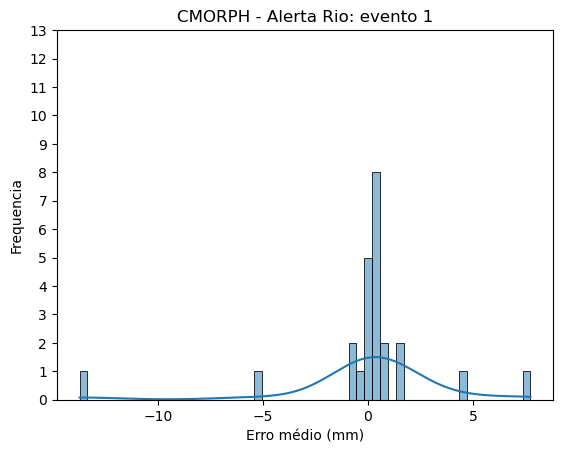

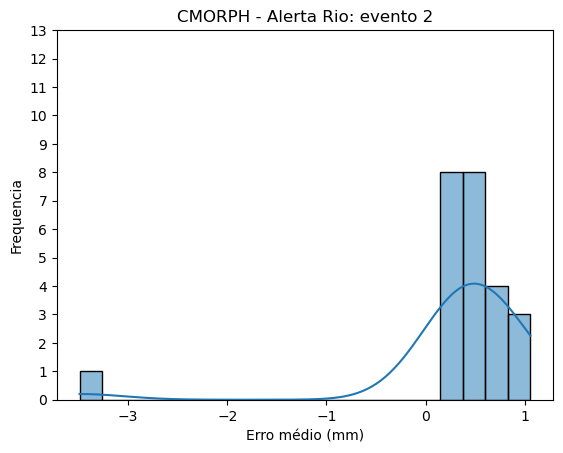

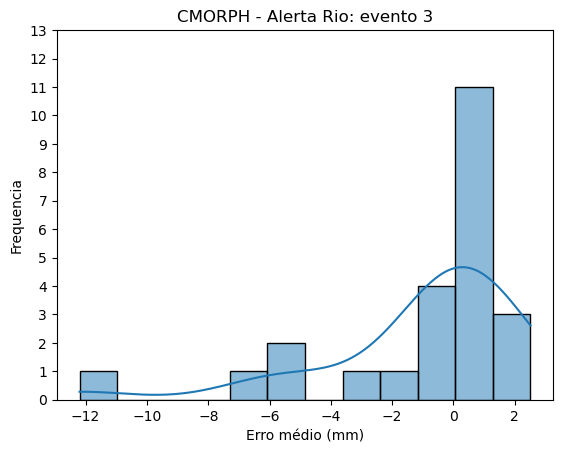

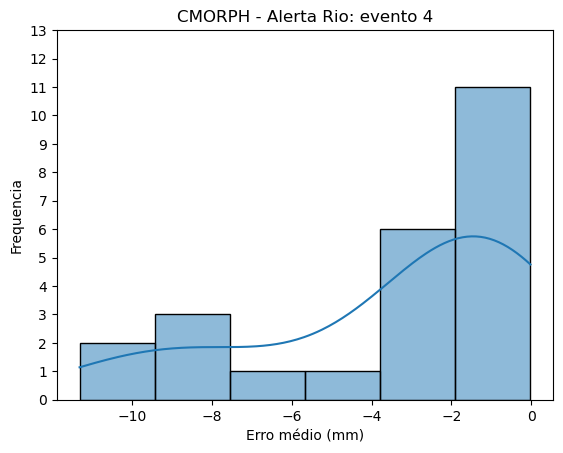

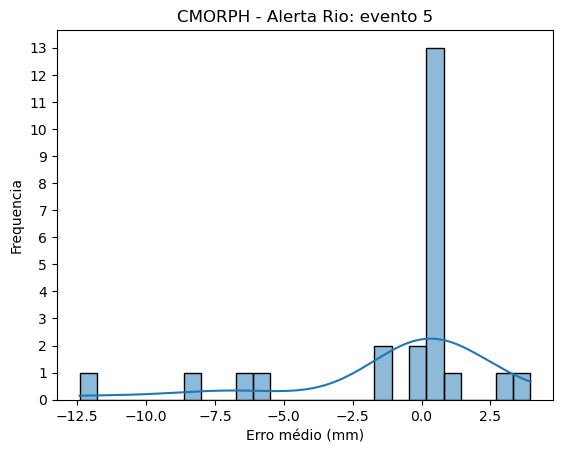

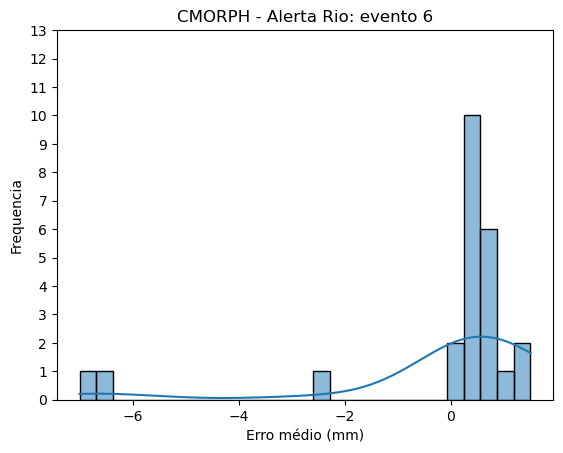

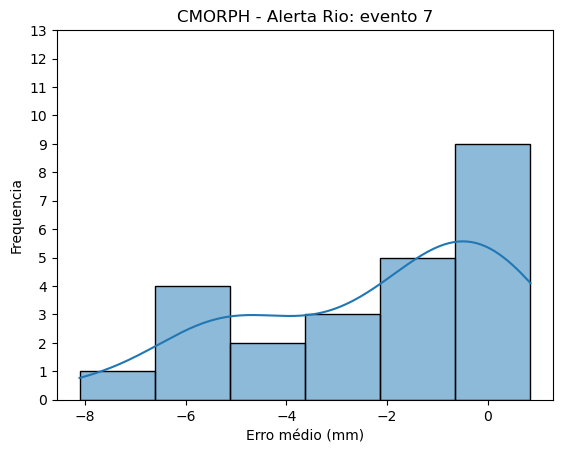

In [ ]:
# Histograma
for evento in df_erro_evento['Evento'].unique():
    fig, ax = plt.subplots()
    erro_medio_evento = df_erro_evento.loc[df_erro_evento['Evento'] == evento].mean(axis = 1, numeric_only = True)
    sns.histplot(erro_medio_evento, ax = ax, kde = True)
    ax.set_title(f'CMORPH - Alerta Rio: evento {int(evento)}')
    ax.set_ylabel('Frequencia')
    ax.set_yticks(np.arange(0,14))
    ax.set_xlabel('Erro médio (mm)')

C:\Users\Edu16\AppData\Local\Temp\ipykernel_14828\3925673055.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_erro_evento, x='Evento', y='ErroMedio', palette='pastel')


Text(0.5, 1.0, 'Distribuição do erro médio')

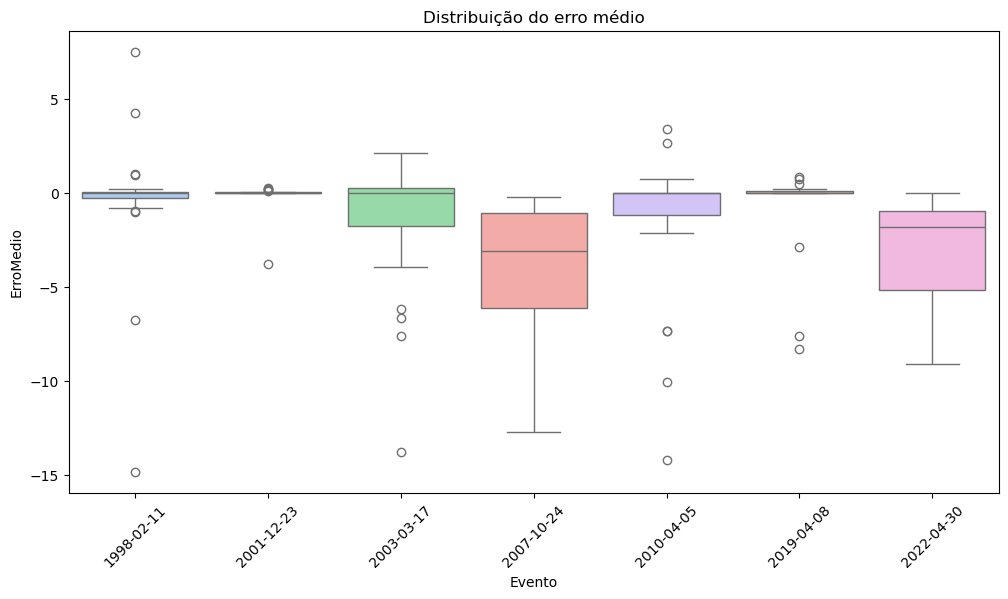

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Lista de datas dos eventos
datas_extremas = ['1998-02-11', '2001-12-23', '2003-03-17', '2007-10-24', '2010-04-05', '2019-04-08', '2022-04-30']

# Garante que Evento é inteiro de 1 a 7
df_erro_evento['Evento'] = df_erro_evento['Evento'].astype(int)

# Adiciona coluna de erro médio entre estações
df_erro_evento['ErroMedio'] = df_erro_evento.drop(columns=['DataHora', 'Evento', 'Hora'], errors='ignore').mean(axis=1, numeric_only=True)

# Cria o plot
plt.figure(figsize=(12, 6))
sns.boxplot(data=df_erro_evento, x='Evento', y='ErroMedio', palette='pastel')

# Substitui os números por datas no eixo x
plt.xticks(ticks=range(len(datas_extremas)), labels=datas_extremas, rotation=45)
plt.title('Distribuição do erro médio')


C:\Users\Edu16\AppData\Local\Temp\ipykernel_14828\1666858863.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_evento, x='Hora', y='ErroMedio', palette='Set2')


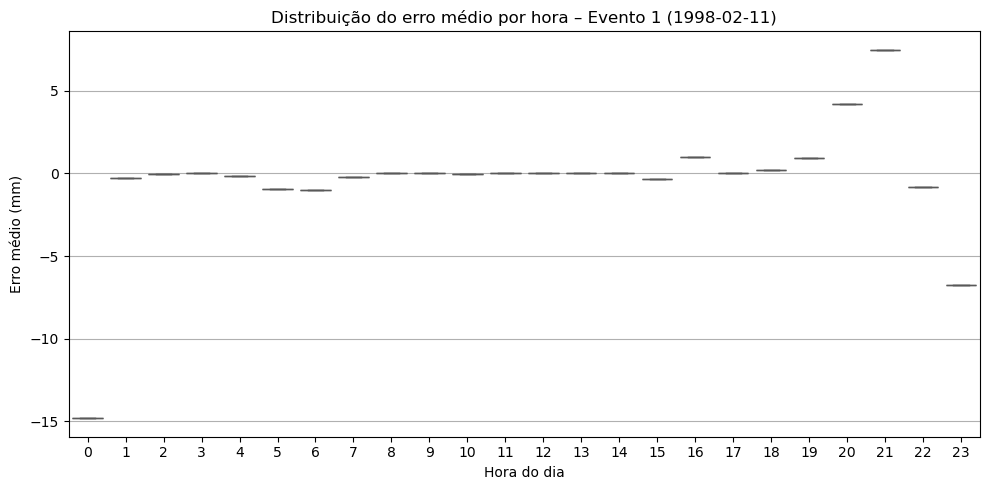

C:\Users\Edu16\AppData\Local\Temp\ipykernel_14828\1666858863.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_evento, x='Hora', y='ErroMedio', palette='Set2')


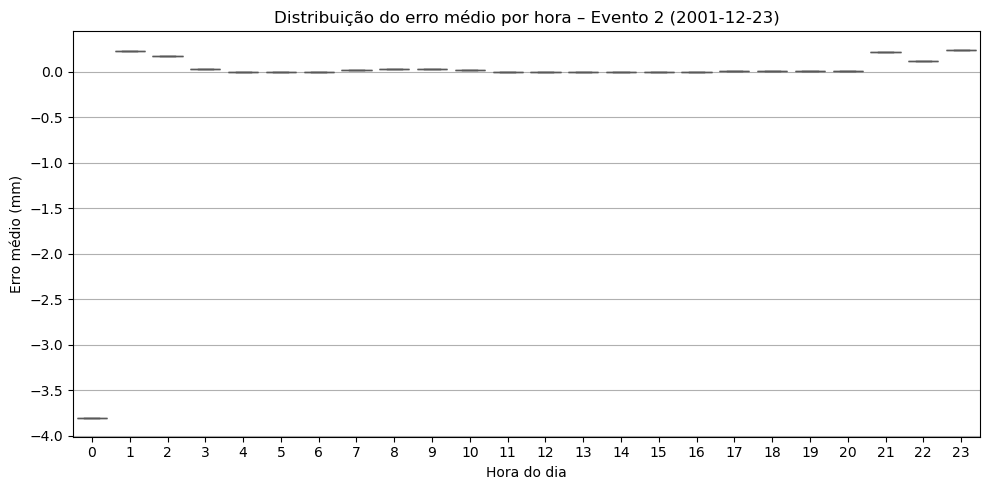

C:\Users\Edu16\AppData\Local\Temp\ipykernel_14828\1666858863.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_evento, x='Hora', y='ErroMedio', palette='Set2')


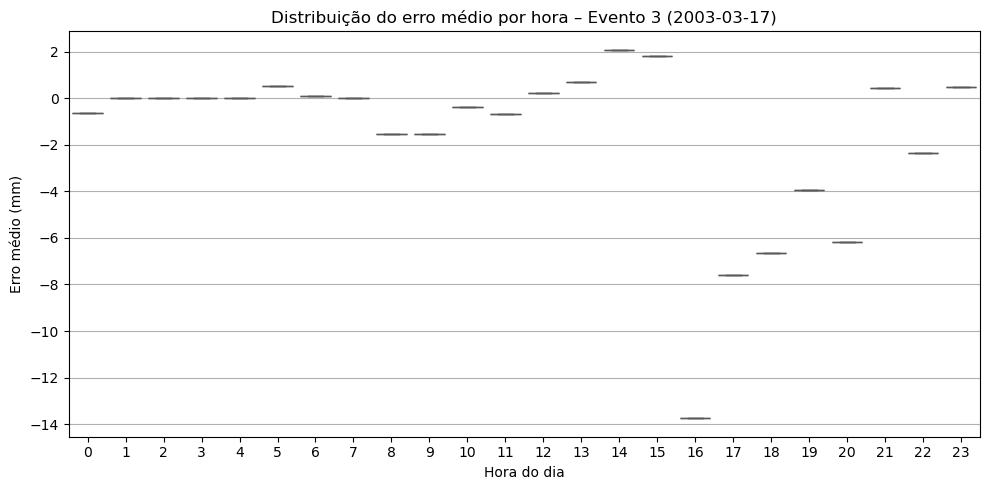

C:\Users\Edu16\AppData\Local\Temp\ipykernel_14828\1666858863.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_evento, x='Hora', y='ErroMedio', palette='Set2')


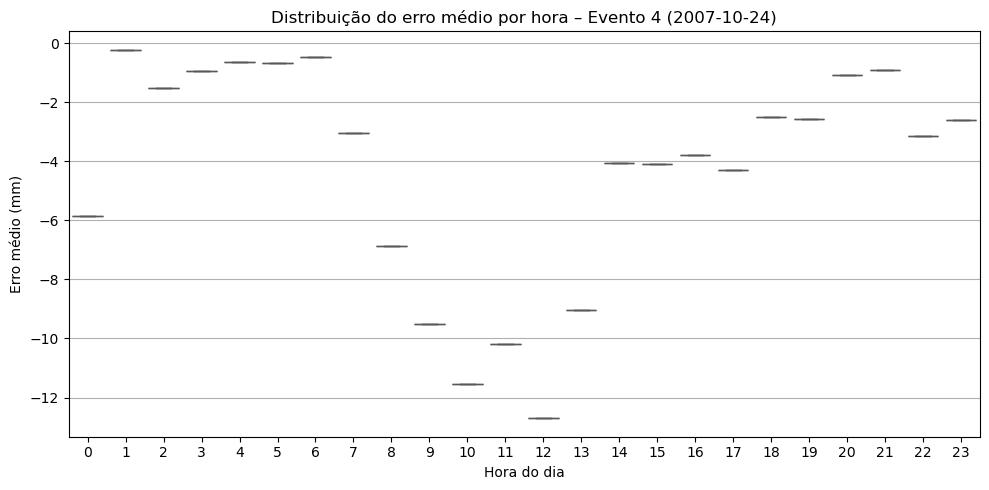

C:\Users\Edu16\AppData\Local\Temp\ipykernel_14828\1666858863.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_evento, x='Hora', y='ErroMedio', palette='Set2')


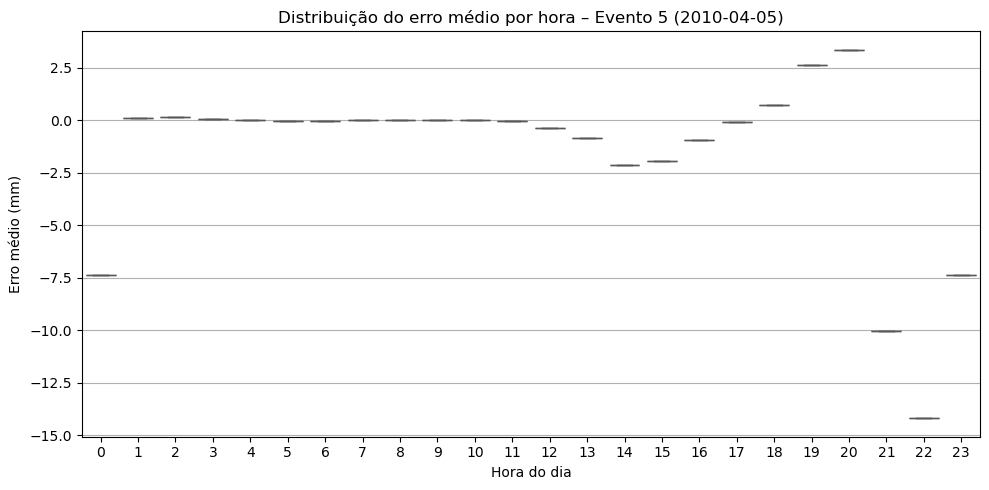

C:\Users\Edu16\AppData\Local\Temp\ipykernel_14828\1666858863.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_evento, x='Hora', y='ErroMedio', palette='Set2')


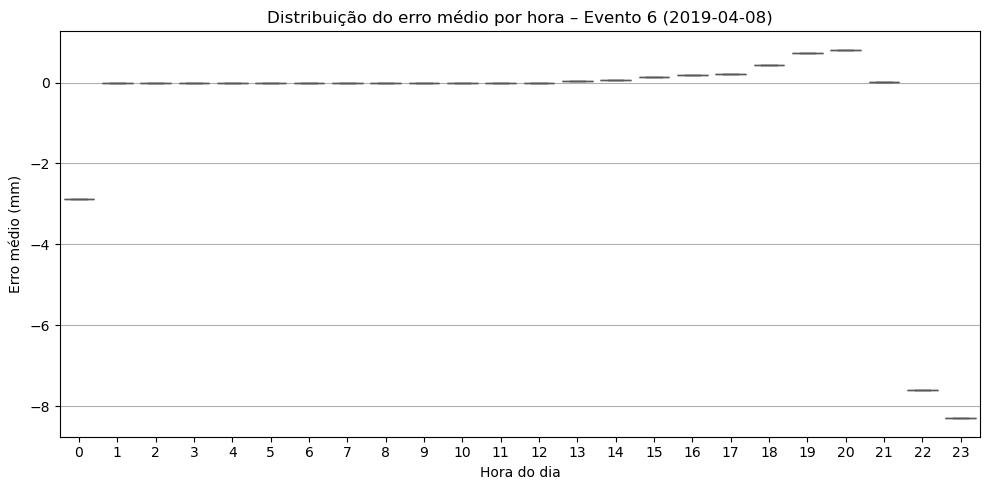

C:\Users\Edu16\AppData\Local\Temp\ipykernel_14828\1666858863.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_evento, x='Hora', y='ErroMedio', palette='Set2')


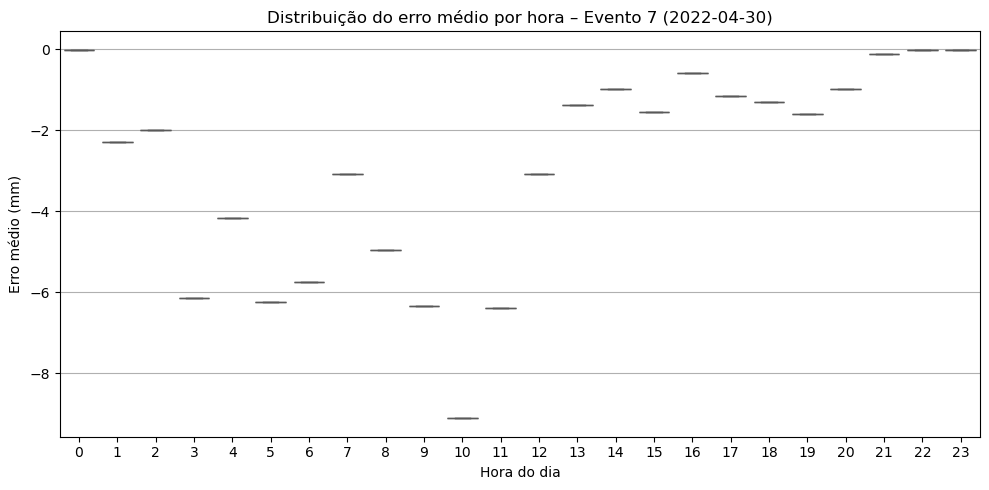

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Datas dos eventos indexadas por número de evento (1 a 7)
datas_extremas = ['1998-02-11', '2001-12-23', '2003-03-17', '2007-10-24', '2010-04-05', '2019-04-08', '2022-04-30']
mapa_evento_data = {i+1: data for i, data in enumerate(datas_extremas)}

# Garante colunas auxiliares
df_erro_evento['Hora'] = pd.to_datetime(df_erro_evento['DataHora']).dt.hour
df_erro_evento['Evento'] = df_erro_evento['Evento'].astype(int)

# Calcula erro médio por linha (entre todas as estações)
colunas_estacoes = df_erro_evento.columns.difference(['DataHora', 'Evento', 'Hora'])
df_erro_evento['ErroMedio'] = df_erro_evento[colunas_estacoes].mean(axis=1, numeric_only=True)

# Boxplot por evento (erro médio por hora)
for evento in sorted(df_erro_evento['Evento'].unique()):
    df_evento = df_erro_evento[df_erro_evento['Evento'] == evento]

    plt.figure(figsize=(10, 5))
    sns.boxplot(data=df_evento, x='Hora', y='ErroMedio', palette='Set2')
    plt.title(f'Distribuição do erro médio por hora – Evento {evento} ({mapa_evento_data[evento]})')
    plt.xlabel('Hora do dia')
    plt.ylabel('Erro médio (mm)')
    plt.grid(True, axis='y')
    plt.tight_layout()
    plt.show()


C:\Users\Edu16\AppData\Local\Temp\ipykernel_14828\3303482473.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_media_hora_evento, x='Hora', y='ErroMedio', palette='coolwarm')


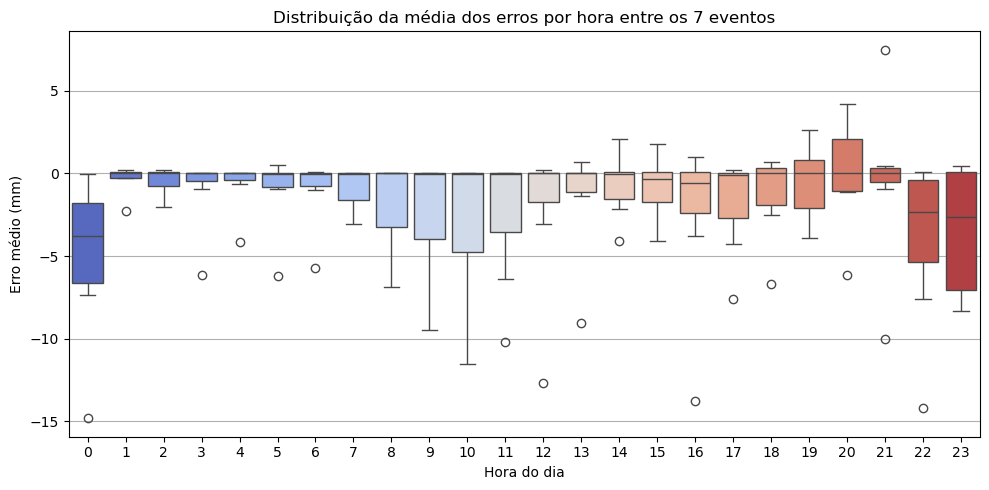

In [ ]:
# Cria novo dataframe com a média de erro por hora de cada evento
df_media_hora_evento = (
    df_erro_evento
    .groupby(['Evento', 'Hora'])['ErroMedio']
    .mean()
    .reset_index()
)

# Boxplot geral: distribuição das médias por hora entre os eventos
plt.figure(figsize=(10, 5))
sns.boxplot(data=df_media_hora_evento, x='Hora', y='ErroMedio', palette='coolwarm')
plt.title('Distribuição da média dos erros por hora entre os 7 eventos')
plt.xlabel('Hora do dia')
plt.ylabel('Erro médio (mm)')
plt.grid(True, axis='y')
plt.tight_layout()
plt.show()


# Calcular probabilidade de detecção e razão de alarme falso para cada evento de chuva.
# Diagrama ROC.

In [ ]:
# Alinha os dados de df_estacoes com os horários de df_cmorph_extremos
df_estacoes_eventos = df_estacoes[df_estacoes['DataHora'].isin(df_cmorph_extremos['DataHora'])].copy()

# Garante o mesmo índice
df_estacoes_eventos.index = df_cmorph_extremos.index

In [ ]:
limiar = 1.0  # mm, por exemplo

df_bin_alerta = (df_estacoes_eventos.drop(columns='DataHora') >= limiar).astype(int)
df_bin_cmorph = (df_cmorph_extremos.drop(columns='DataHora') >= limiar).astype(int)

# Copia a coluna Evento
df_bin_alerta['Evento'] = df_cmorph_extremos['Evento'].values
df_bin_cmorph['Evento'] = df_cmorph_extremos['Evento'].values


In [ ]:
from sklearn.metrics import confusion_matrix

resultados = []

# Adiciona a coluna 'Evento' ao df_cmorph_extremos, se ainda não estiver presente
if 'Evento' not in df_cmorph_extremos.columns:
    df_cmorph_extremos['Evento'] = pd.to_datetime(df_cmorph_extremos['DataHora']).dt.year.rank(method='dense').astype(int)

for evento in sorted(df_cmorph_extremos['Evento'].unique()):
    # Subconjuntos por evento
    y_true = df_bin_alerta[df_cmorph_extremos['Evento'] == evento].values.flatten()
    y_pred = df_bin_cmorph[df_cmorph_extremos['Evento'] == evento].values.flatten()

    tn, fp, fn, tp = confusion_matrix(y_true, y_pred, labels=[0,1]).ravel()

    pod = tp / (tp + fn) if (tp + fn) > 0 else 0
    far = fp / (tp + fp) if (tp + fp) > 0 else 0

    resultados.append({'Evento': evento, 'POD': pod, 'FAR': far})

df_resultados = pd.DataFrame(resultados)
df_resultados


,Evento,POD,FAR
0,1,0.806250,0.548951
1,2,0.842105,0.418182
2,3,0.768340,0.412979
3,4,0.422680,0.152893
4,5,0.705584,0.232044
5,6,1.000000,0.456647
6,7,0.093750,0.289474


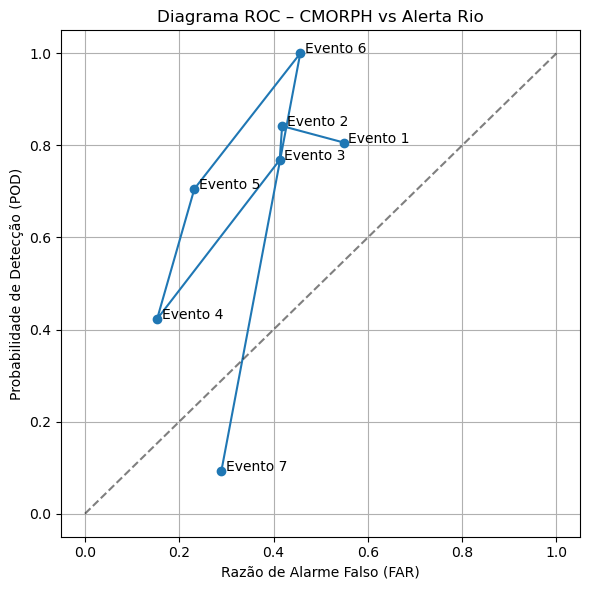

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(6, 6))
plt.plot(df_resultados['FAR'], df_resultados['POD'], marker='o')
for i, row in df_resultados.iterrows():
    plt.text(row['FAR'] + 0.01, row['POD'], f'Evento {int(row["Evento"])}')

plt.xlabel('Razão de Alarme Falso (FAR)')
plt.ylabel('Probabilidade de Detecção (POD)')
plt.title('Diagrama ROC – CMORPH vs Alerta Rio')
plt.grid(True)
plt.plot([0, 1], [0, 1], 'k--', alpha=0.5)  # linha de referência
plt.tight_layout()
plt.show()
